In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)


100%|██████████| 250/250 [00:00<00:00, 7372.50it/s]

Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (40, 1, 126)
Train Labels shape is  (40, 2)
Classes trained are: 0 to 2


  0%|          | 1/5000 [00:00<09:04,  9.17it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 5
Class 1, class 1 neurons = 1, class 0 neurons = 5


100%|██████████| 5000/5000 [09:00<00:00,  9.24it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.042     |
| zero_one_loss       | 0.076     |
| one_error           | 0.008     |
| micro av. jaccard   | 0.0869565 |
| macro av. jaccard   | 0.0884615 |
| micro av. precision | 1         |
| macro av. precision | 1         |
| micro av. recall    | 0.0869565 |
| macro av. recall    | 0.0884615 |
| micro av. f1        | 0.16      |
| macro av. f1        | 0.162338  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.042     |
| zero_one_loss       | 0.076     |
| one_error           | 0.008     |
| micro av. jaccard   | 0.0869565 |
| macro av. jaccard   | 0.0884615 |
| micro av. precision | 1         |
| macro av. pr

  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 7
Class 2, class 1 neurons = 1, class 0 neurons = 7
Class 3, class 1 neurons = 1, class 0 neurons = 7


100%|██████████| 5000/5000 [18:57<00:00,  4.40it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.132    |
| zero_one_loss       | 0.228    |
| one_error           | 0.036    |
| micro av. jaccard   | 0.142857 |
| macro av. jaccard   | 0.146375 |
| micro av. precision | 0.244444 |
| macro av. precision | 0.244071 |
| micro av. recall    | 0.255814 |
| macro av. recall    | 0.272624 |
| micro av. f1        | 0.25     |
| macro av. f1        | 0.254167 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.087    |
| zero_one_loss       | 0.284    |
| one_error           | 0        |
| micro av. jaccard   | 0.13     |
| macro av. jaccard   | 0.117418 |
| micro av. precision | 0.276596 |
| macro av. precision | 0.622036 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 7
Class 2, class 1 neurons = 1, class 0 neurons = 9
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 3, class 0 neurons = 7
Class 5, class 1 neurons = 2, class 0 neurons = 7


100%|██████████| 5000/5000 [27:18<00:00,  3.05it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.234    |
| zero_one_loss       | 0.404    |
| one_error           | 0.064    |
| micro av. jaccard   | 0.282209 |
| macro av. jaccard   | 0.231585 |
| micro av. precision | 0.484211 |
| macro av. precision | 0.405123 |
| micro av. recall    | 0.403509 |
| macro av. recall    | 0.336462 |
| micro av. f1        | 0.440191 |
| macro av. f1        | 0.367604 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 6) (250, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.132667 |
| zero_one_loss       | 0.536    |
| one_error           | 0        |
| micro av. jaccard   | 0.222656 |
| macro av. jaccard   | 0.149996 |
| micro av. precision | 0.428571 |
| macro av. precision | 0.551708 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 7
Class 1, class 1 neurons = 1, class 0 neurons = 7
Class 2, class 1 neurons = 1, class 0 neurons = 9
Class 3, class 1 neurons = 1, class 0 neurons = 8
Class 4, class 1 neurons = 4, class 0 neurons = 8
Class 5, class 1 neurons = 2, class 0 neurons = 8
Class 6, class 1 neurons = 4, class 0 neurons = 5
Class 7, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 5000/5000 [35:42<00:00,  2.33it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.22     |
| zero_one_loss       | 0.396    |
| one_error           | 0.044    |
| micro av. jaccard   | 0.364162 |
| macro av. jaccard   | 0.332369 |
| micro av. precision | 0.543103 |
| macro av. precision | 0.561412 |
| micro av. recall    | 0.525    |
| macro av. recall    | 0.475275 |
| micro av. f1        | 0.533898 |
| macro av. f1        | 0.493823 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.15     |
| zero_one_loss       | 0.716    |
| one_error           | 0        |
| micro av. jaccard   | 0.28401  |
| macro av. jaccard   | 0.196383 |
| micro av. precision | 0.5      |
| macro av. precision | 0.569263 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 8
Class 1, class 1 neurons = 1, class 0 neurons = 8
Class 2, class 1 neurons = 1, class 0 neurons = 10
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 5, class 0 neurons = 11
Class 5, class 1 neurons = 2, class 0 neurons = 9
Class 6, class 1 neurons = 4, class 0 neurons = 6
Class 7, class 1 neurons = 4, class 0 neurons = 6
Class 8, class 1 neurons = 5, class 0 neurons = 6
Class 9, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 5000/5000 [49:41<00:00,  1.68it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.206    |
| zero_one_loss       | 0.368    |
| one_error           | 0.044    |
| micro av. jaccard   | 0.622711 |
| macro av. jaccard   | 0.438914 |
| micro av. precision | 0.696721 |
| macro av. precision | 0.505206 |
| micro av. recall    | 0.854271 |
| macro av. recall    | 0.644721 |
| micro av. f1        | 0.767494 |
| macro av. f1        | 0.565103 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 10) (250, 10)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.1632   |
| zero_one_loss       | 0.8      |
| one_error           | 0        |
| micro av. jaccard   | 0.405248 |
| macro av. jaccard   | 0.239476 |
| micro av. precision | 0.597849 |
| macro av. precision | 0.555962 

  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 9
Class 1, class 1 neurons = 1, class 0 neurons = 8
Class 2, class 1 neurons = 1, class 0 neurons = 10
Class 3, class 1 neurons = 1, class 0 neurons = 10
Class 4, class 1 neurons = 5, class 0 neurons = 11
Class 5, class 1 neurons = 2, class 0 neurons = 9
Class 6, class 1 neurons = 4, class 0 neurons = 6
Class 7, class 1 neurons = 4, class 0 neurons = 6
Class 8, class 1 neurons = 5, class 0 neurons = 6
Class 9, class 1 neurons = 3, class 0 neurons = 7
Class 10, class 1 neurons = 1, class 0 neurons = 7
Class 11, class 1 neurons = 2, class 0 neurons = 5


100%|██████████| 5000/5000 [1:12:27<00:00,  1.15it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 2) (250, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.138    |
| zero_one_loss       | 0.248    |
| one_error           | 0.028    |
| micro av. jaccard   | 0.126582 |
| macro av. jaccard   | 0.116585 |
| micro av. precision | 0.416667 |
| macro av. precision | 0.52381  |
| micro av. recall    | 0.153846 |
| macro av. recall    | 0.138889 |
| micro av. f1        | 0.224719 |
| macro av. f1        | 0.208169 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.158    |
| zero_one_loss       | 0.824    |
| one_error           | 0        |
| micro av. jaccard   | 0.371353 |
| macro av. jaccard   | 0.210054 |
| micro av. precision | 0.595745 |
| macro av. precision | 0.551429 

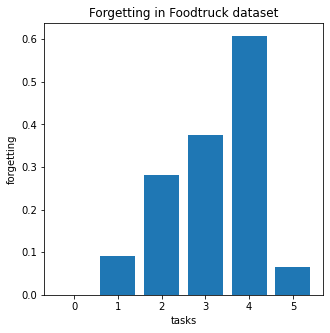

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': [40, 40, 40, 40, 40, 50], 'labels': [2, 2, 2, 2, 2, 2]},
    'seed': 5,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)